In [1]:
# Activate the following in colab : 
#!pip3 install netCDF4
#!apt install proj-bin libproj-dev libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip

import pandas as pd 
import math
from datetime import datetime,date
import datetime
import numpy as np
import xarray as xr

/home/maltem/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:124: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
#era5 = pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/ERA5_MOSAiC_2019-2020.csv")

In [3]:
era5_sfs30 = pd.read_csv('https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/v02/mosasfs30_ERA5.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(era5_sfs30))):
    era5_sfs30['datetime'][i]= datetime.datetime.strptime(era5_sfs30.datetime[i], '%Y-%m-%d %H:%M:%S')

     
era5_sfs40 = pd.read_csv('https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/v02/mosasfs40_ERA5.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(era5_sfs40))):
    era5_sfs40['datetime'][i]= datetime.datetime.strptime(era5_sfs40.datetime[i], '%Y-%m-%d %H:%M:%S')    
    
    
era5_sfs50 = pd.read_csv('https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/v02/mosasfs50_ERA5.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(era5_sfs50))):
    era5_sfs50['datetime'][i]= datetime.datetime.strptime(era5_sfs50.datetime[i], '%Y-%m-%d %H:%M:%S')      

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [4]:
arome_sfs30 = pd.read_csv('https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/v02/mosasfs30_AROME.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(arome_sfs30))):
    arome_sfs30['datetime'][i]= datetime.datetime.strptime(arome_sfs30.datetime[i], '%Y-%m-%d %H:%M:%S')

arome_sfs40 = pd.read_csv('https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/v02/mosasfs40_AROME.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(arome_sfs40))):
    arome_sfs40['datetime'][i]= datetime.datetime.strptime(arome_sfs40.datetime[i], '%Y-%m-%d %H:%M:%S')    
    
arome_sfs50 = pd.read_csv('https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/v02/mosasfs50_AROME.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(arome_sfs50))):
    arome_sfs50['datetime'][i]= datetime.datetime.strptime(arome_sfs50.datetime[i], '%Y-%m-%d %H:%M:%S')    
    

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Load observations

In [5]:
mosasfs30met = xr.open_dataset("https://thredds.met.no/thredds/dodsC/metusers/maltem/MOSAiC/mosasfs30met.level2.10min.all.nc")
mosasfs40met = xr.open_dataset("https://thredds.met.no/thredds/dodsC/metusers/maltem/MOSAiC/mosasfs40met.level2.10min.all.nc")
mosasfs50met = xr.open_dataset("https://thredds.met.no/thredds/dodsC/metusers/maltem/MOSAiC/mosasfs50met.level2.10min.all.nc")

#### Interpolate to hourly values

In [6]:
mosasfs30met_1h = mosasfs30met.resample(time="1H").interpolate("linear")
mosasfs40met_1h = mosasfs40met.resample(time="1H").interpolate("linear")
mosasfs50met_1h = mosasfs50met.resample(time="1H").interpolate("linear")

#### Plot

Text(0.5, 1.0, 'Wind Speed')

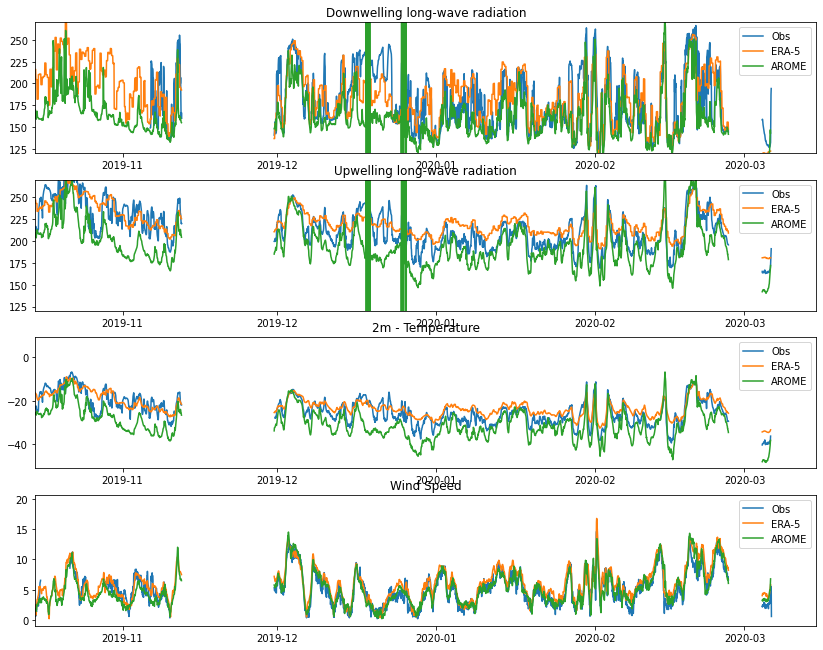

In [10]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

tstart=pd.Timestamp('2019-10-15')
tend=pd.Timestamp('2020-3-15')

fig = plt.figure(figsize=(14,14))

ax1 = plt.subplot(511)
ax1.plot(mosasfs30met_1h.time, mosasfs30met_1h.down_long_hemisp, '-',label='Obs')
ax1.plot(era5_sfs30.datetime,era5_sfs30['strd']/3600,'-',label='ERA-5')
ax1.plot(arome_sfs30.datetime,arome_sfs30['strd']/3600,'-',label='AROME')
ax1.set_xlim(tstart,tend)
ax1.legend()
ax1.set_ylim(120,270)
plt.title('Downwelling long-wave radiation')

ax1 = plt.subplot(512)
ax1.plot(mosasfs30met_1h.time, mosasfs30met_1h.up_long_hemisp, '-',label='Obs')
ax1.plot(era5_sfs30.datetime,(era5_sfs30['strd']-era5_sfs30['stru'])/3600,'-',label='ERA-5')
ax1.plot(arome_sfs30.datetime,(arome_sfs30['strd']-arome_sfs30['strn'])/3600,'-',label='AROME')
ax1.set_xlim(tstart,tend)
ax1.legend()
ax1.set_ylim(120,270)
plt.title('Upwelling long-wave radiation')


ax2 = plt.subplot(513)
ax2.plot(mosasfs30met_1h.time, mosasfs30met_1h.temp, '-',label='Obs')
ax2.plot(era5_sfs30.datetime,era5_sfs30['t2m']-273.15,'-',label='ERA-5')
ax2.plot(arome_sfs30.datetime,arome_sfs30['t2m']-273.15,'-',label='AROME')
ax2.set_xlim(tstart,tend)
#ax1.set_ylim(120,270)
ax2.legend()
plt.title('2m - Temperature')

#ax3 = plt.subplot(513)
#ax3.plot(era5_sfs30.datetime,era5_sfs30['hsnow'],'-')
#ax3.plot(era5_sfs40.datetime,era5_sfs40['hsnow'],'-')
#ax3.plot(era5_sfs50.datetime,era5_sfs50['hsnow'],'-')
#ax3.set_xlim(tstart,tend)
#plt.title('TOPAZ snow depth')

ax3 = plt.subplot(514)
ax3.plot(mosasfs30met_1h.time,mosasfs30met_1h.wspd_vec_mean, '-',label='Obs')
ax3.plot(era5_sfs30.datetime,np.sqrt(era5_sfs30['u10m']**2+era5_sfs30['v10m']**2),'-',label='ERA-5')
ax3.plot(arome_sfs30.datetime,np.sqrt(arome_sfs30['u10m']**2+arome_sfs30['v10m']**2),'-',label='AROME')
#ax3.plot(era5_sfs50.datetime,era5_sfs50['hsnow'],'-')
ax3.set_xlim(tstart,tend)
#ax1.set_ylim(120,270)
ax3.legend()
plt.title('Wind Speed')




Text(0.5, 1.0, 'Comparison of MODIS infrared versus MOSAiC skin')

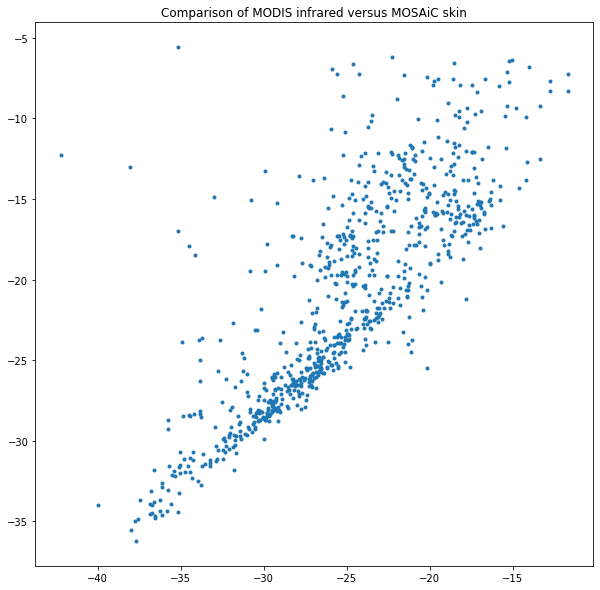

In [6]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot(111)
ax1.plot(era5_sfs50['ist']-273.15, mosasfs50met_1h['skin_temp_surface'], '.')

plt.title('Comparison of MODIS infrared versus MOSAiC skin')

(120.0, 400.0)

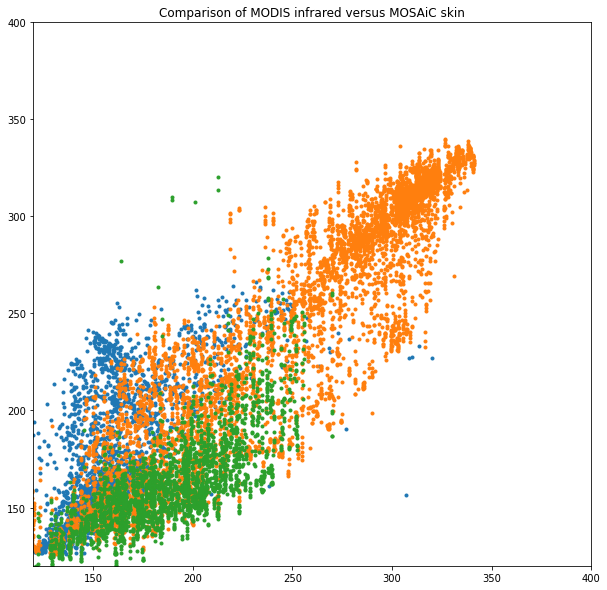

In [37]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot(111)
ax1.plot((arome_sfs30['strd'])/3600, mosasfs30met_1h['down_long_hemisp'], '.')
ax1.plot((era5_sfs30['strd'])/3600 , mosasfs30met_1h['down_long_hemisp'], '.')
ax1.plot((era5_sfs30['strd'])/3600 , (arome_sfs30['strd'])/3600, '.')


plt.title('Comparison of MODIS infrared versus MOSAiC skin')
ax1.set_xlim([120, 400])
ax1.set_ylim([120, 400])


In [57]:
era5_sfs50

,datetime,ssrd,strd,ssru,stru,t2m,u10m,v10m,sp,tcc,skt,istl,sstk,ci,hice,fice,hsnow,ist
0,2019-10-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-08 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-10-08 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-10-08 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-10-08 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,2020-10-01 19:00:00,0.0,1039529.44,3.600000e-12,-172130.40,276.57382,7.914225,0.436342,100093.11,0.982330,277.64267,271.46024,277.78300,0.0,0.0,0.0,0.0,NaN
8636,2020-10-01 20:00:00,0.0,1029511.06,3.600000e-12,-180037.60,276.68256,7.762076,0.458162,100192.79,0.911652,277.52463,271.46024,277.66028,0.0,0.0,0.0,0.0,NaN
8637,2020-10-01 21:00:00,0.0,987169.20,3.600000e-12,-221799.64,276.72467,8.326007,-0.144815,100052.35,0.671453,277.52548,271.46024,277.64587,0.0,0.0,0.0,0.0,NaN
8638,2020-10-01 22:00:00,0.0,974305.94,3.600000e-12,-228937.77,276.74900,8.292004,-0.192102,100003.91,0.583963,277.22995,271.46024,277.34222,0.0,0.0,0.0,0.0,NaN


In [58]:
mosasfs30met_1h

<xarray.Dataset>
Dimensions:                  (time: 8688)
Coordinates:
  * time                     (time) datetime64[ns] 2019-10-06 ... 2020-10-01T...
Data variables:
    lat                      (time) float64 nan nan nan ... 78.92 78.79 78.66
    lon                      (time) float64 nan nan nan ... 9.098 9.333 9.574
    heading                  (time) float64 nan nan nan ... 69.83 69.99 69.98
    zenith_true              (time) float64 nan nan nan ... 103.0 104.4 105.0
    zenith_apparent          (time) float64 nan nan nan ... 103.0 104.4 105.0
    azimuth                  (time) float64 nan nan nan ... 327.0 342.6 358.3
    ship_distance            (time) float64 nan nan nan nan ... nan nan nan nan
    ship_bearing             (time) float64 nan nan nan nan ... nan nan nan nan
    sr50_dist                (time) float64 nan nan nan ... 203.2 203.2 203.2
    snow_depth               (time) float64 nan nan nan nan ... nan nan nan nan
    atmos_pressure           (time) float64 nan nan nan ... 1.03e+03 1.03e+03
    temp                     (time) float64 nan nan nan ... -0.0192 0.3334
    rh                       (time) float64 nan nan nan ... 83.74 80.99 80.71
    dew_point                (time) float64 nan nan nan ... -2.658 -2.875 -2.577
    mixing_ratio             (time) float64 nan nan nan ... 3.048 2.999 3.066
    vapor_pressure           (time) float64 nan nan nan ... 502.3 494.3 505.4
    rhi                      (time) float64 nan nan nan ... 83.96 81.01 80.46
    brightness_temp_surface  (time) float64 nan nan nan ... -1.606 -2.361 -2.127
    skin_temp_surface        (time) float64 nan nan nan ... -1.344 -1.625 -1.366
    subsurface_heat_flux_A   (time) float64 nan nan nan nan ... nan nan nan nan
    subsurface_heat_flux_B   (time) float64 nan nan nan nan ... 96.29 40.89 nan
    wspd_vec_mean            (time) float64 nan nan nan ... 1.653 1.833 0.2805
    wdir_vec_mean            (time) float64 nan nan nan nan ... 85.83 78.0 251.0
    acoustic_temp            (time) float64 nan nan nan ... 3.915 4.201 4.594
    h2o_licor                (time) float64 nan nan nan nan ... nan nan nan nan
    co2_licor                (time) float64 nan nan nan nan ... nan nan nan nan
    down_long_hemisp         (time) float64 nan nan nan ... 292.4 248.2 252.5
    down_short_hemisp        (time) float64 nan nan nan ... 0.9702 1.182 1.209
    up_long_hemisp           (time) float64 nan nan nan ... 309.2 307.3 308.5
    up_short_hemisp          (time) float64 nan nan nan ... 0.304 0.5219 0.4959
    net_radiation            (time) float64 nan nan nan ... -16.16 -58.4 -55.34
Attributes:
    CDI:                             Climate Data Interface version ?? (http:...
    Conventions:                     CF-1.6
    history:                         Tue Jan 26 21:51:44 2021: cdo mergetime ...
    source:                          Observations made during the MOSAiC drif...
    institution:                     CIRES, University of Colorado and NOAA P...
    date_created:                    Fri Jan 15 20:34:51 2021
    title:                           MOSAiC flux group data product: 
    contact:                         Matthew Shupe, University of Colorado, m...
    file_creator:                    Michael R. Gallagher; Christopher J. Cox
    creator_email:                   michael.r.gallagher@noaa.gov; christophe...
    project:                         MOSAiC, PS-122: Thermodynamic and Dynami...
    Funding:                         Funding sources: National Science Founda...
    system:                          asfs30
    keywords:                        Polar, Arctic, Supersite, Observations, ...
    conventions:                     cf convention variable naming as attribu...
    version:                         1.5, 1/8/2020
    quality_control:                 Significant quality control in place for...
    CDO:                             Climate Data Operators version 1.9.3 (ht...
    DODS_EXTRA.Unlimited_Dimension:  time